# Data Science Methods for Clean Energy Research 
## *Introduction to machine learning: KNN classification*

## Outline

Today, we will look at the problem of classification in machine learning. Specifically we will consider the supervised machine learning K-nearest neighbors, KNN, classification method. 

We will also start looking at the `scikit-learn` library which implements functions for Machine Learning algorithms. Main webpage for scikit-learn can be found [here](https://scikit-learn.org/stable/).

### 1. Introduction to KNN
* 1.1 The algorithm
* 1.2 Nearest points

### 2. Example with KNN
* 2.1 The iris dataset
* 2.2 Fitting a KNN and predicting
* 2.3 The role of K


---

## Let's load the libraries / modules

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns

import sklearn
from sklearn import neighbors, datasets
from sklearn.model_selection import train_test_split

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap
%matplotlib inline
matplotlib.rcParams.update({'font.size': 18})

## 1. Introduction to K-nearest neighbor classification

The KNN classifier works on assigning the probability of membership in a class $j$ based on the **distance to other members** in a class. In this process it estimates the conditional probability of $Y = j$ given a test observation $x_{0}$. 

### 1.1 The KNN algorithm

The KNN algorithm can be described as following.

You have a **training** data set $D_{\sf train}$ with _N_ points, a **test observation** $x_{test}=x_0$ and a **set of classes** or categories  $C={C_1, C_2, .., C_{N_{\sf classes}}}$. You know which class each value in $D_{\sf train}$ belongs to and desire to know what is the most likely class $x_0$ belongs to - i.e. you want to classify it.

* Find $K$ points in $D_{\sf train}$ which are closest to $x_0$.
    * For each $(x, C_x) \in D_{\sf train}$ compute the distance between $x$ and $x_0$ (usually Euclidean distances - the L2 norm)
    * Sort the distances
    * Take the top $K$ nearest points and define that set as $\mathcal{N}_0$
   
    
* Count the number of points in $\mathcal{N}_0$ which fall in each class  i.e. we are estimating the conditional probability of $x_0$ belonging to class $j$ as the fraction of points in $\mathcal{N}_0$ whose response values equals $j$. Mathematically:

$${\sf Pr}\left(Y = j \mid X = x_{\sf{0}}\right)=\frac{1}{K}\sum_{i\in\mathcal{N}_0}I(y_i=j)$$ 

* Note: Sometimes it is convenient to add a weight term which is e.g. inversely proportional to the distance when assigning points to classes. This allows points which are very close to the target to count more than points which are further away. In this case the method is referred to as **weighted KNN**

* Choose the class as the one with the largest fraction of points


<div>
<img src="https://miro.medium.com/max/1182/0*oq9T_Rg75IF4bIW_.png" width="400" align=center>
</div>

Now how do we implement this in Python? Luckily for use `scikit-learn` comes to the rescue - https://scikit-learn.org/stable/

### 1.1 Nearest points 

The data in each dimension of X should be **scaled similarly**! 
We are concerned with **relative** distances in the parameter space, not absolute distances in the underlying units.

Otherwise units, dimensionality, etc. can drastically favor closeness in arbitrary dimensions of X. 

## 2. Example with KNN's

### 2.1 The iris flower dataset

Let's look at the [iris flower dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set). For more information see [here](https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html#sphx-glr-auto-examples-neighbors-plot-classification-py). 

If you are curious to see how you could code this from scratch see [here](https://machinelearningmastery.com/tutorial-to-implement-k-nearest-neighbors-in-python-from-scratch/)

In [5]:
# import the iris dataset into a dictionary like object
iris = datasets.load_iris()

print("keys:\n", iris.keys())
print("\ninput feature names:\n", iris['feature_names'])
print("\ntarget class names:\n", iris['target_names'])
print("\ntarget class values:\n", iris['target'])
print(iris['data'])

keys:
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

input feature names:
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

target class names:
 ['setosa' 'versicolor' 'virginica']

target class values:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.

Define the **training** and **testing** data. Out of simplicity we will only take two input features as our X values. We usually want the training dataset to be larger than the testing dataset ~ between 70-85% is most common. 

In [9]:
# We only take the first two features. 
X = iris.data[:, :2]  # Training set input - sepal length and width
y = iris.target       # Y - our target classes - we define these as Y as 
                      # because that is the standard notation for a targetin ML
print(len(y))

150


Here we set the training data set to be 80% of the data and the test set 20%

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=14)

print(X_train)
print(len(y_train), len(y_test))
print(y_train, y_test)

[[5.1 3.4]
 [5.  2.3]
 [6.1 2.8]
 [5.8 4. ]
 [5.6 2.5]
 [5.5 3.5]
 [5.9 3. ]
 [5.5 2.4]
 [6.  2.2]
 [6.4 3.2]
 [7.2 3.2]
 [5.1 3.8]
 [5.7 4.4]
 [5.8 2.7]
 [6.4 2.7]
 [6.1 2.6]
 [4.9 3.1]
 [4.4 2.9]
 [4.4 3. ]
 [6.3 2.3]
 [5.  3.3]
 [5.  3.4]
 [7.7 2.8]
 [6.7 3. ]
 [6.7 3.1]
 [6.3 3.4]
 [5.8 2.7]
 [5.5 4.2]
 [5.7 2.8]
 [6.5 3. ]
 [5.6 2.9]
 [6.1 3. ]
 [6.1 3. ]
 [6.  3.4]
 [5.1 2.5]
 [7.2 3. ]
 [5.9 3.2]
 [6.8 2.8]
 [5.7 2.8]
 [5.6 2.7]
 [6.3 2.5]
 [6.  2.2]
 [6.  2.7]
 [6.5 3.2]
 [6.7 3.1]
 [5.  3.2]
 [5.3 3.7]
 [6.2 2.8]
 [5.2 3.4]
 [6.5 3. ]
 [4.6 3.1]
 [4.8 3.4]
 [6.4 3.2]
 [6.9 3.1]
 [5.4 3.9]
 [7.  3.2]
 [6.9 3.1]
 [6.7 3.3]
 [5.6 2.8]
 [5.  2. ]
 [6.  2.9]
 [7.6 3. ]
 [6.4 2.9]
 [6.8 3.2]
 [7.4 2.8]
 [6.3 3.3]
 [5.1 3.7]
 [7.9 3.8]
 [5.7 2.6]
 [6.3 3.3]
 [4.3 3. ]
 [6.4 2.8]
 [5.5 2.4]
 [6.7 3. ]
 [6.6 3. ]
 [4.9 2.4]
 [6.7 3.1]
 [5.1 3.8]
 [4.8 3.1]
 [4.8 3. ]
 [5.4 3.7]
 [6.1 2.9]
 [6.5 3. ]
 [6.3 2.5]
 [4.9 3. ]
 [5.8 2.8]
 [5.  3.5]
 [5.5 2.6]
 [7.7 3.8]
 [5.2 3.5]
 [5.2 2.7]

### 2.2 Fitting and predicting classes with KNN in `scikit-learn`

### Fitting

We define a number of nearest neighbors K

In [14]:
K_neighbors = 8

Train a KNN classifier on the training set - for each input feature we are training it to predict the corresponding class. Here we will use the `scikit-learn` KNN class - for more info see [here](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

`KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None, **kwargs)`

* `n_neighbors` is our K value - number of nearest neighbors
* `weights='uniform'` indicates that we apply KNN not the distance weighted KNN
* by setting `p=2` we use the Euclidean distance. The other parameters are related to other methods to compute distances. 



In [16]:
# We create an instance of Neighbours Classifier and fit it to the training data.
# if you set weights = 'distance' here you will have a weighted KNN classifier
clf = neighbors.KNeighborsClassifier(K_neighbors, weights='uniform')

# Here we fit it to the data - it figures out the classes and 
# which training X points belong to each class in Y 
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [17]:
print(clf.classes_, clf.effective_metric_, clf.n_samples_fit_)

[0 1 2] euclidean 120


### Predicting

Now we will use the trained classifier to decide which class the test set points belongs to

In [18]:
y_test_predicted = clf.predict(X_test)
y_test_probabilities = clf.predict_proba(X_test)
mean_accuracy = clf.score(X_test, y_test)

print("predicted classes", y_test_predicted)
print("KNN probability of belonging to class",y_test_probabilities)
print("Mean accuracy of prediction", mean_accuracy)



predicted classes [0 0 0 1 1 2 0 1 0 1 1 0 2 1 0 1 0 1 1 1 0 0 0 2 0 2 0 1 1 0]
KNN probability of belonging to class [[1.    0.    0.   ]
 [1.    0.    0.   ]
 [1.    0.    0.   ]
 [0.    1.    0.   ]
 [0.    0.75  0.25 ]
 [0.    0.375 0.625]
 [1.    0.    0.   ]
 [0.    0.625 0.375]
 [1.    0.    0.   ]
 [0.    0.625 0.375]
 [0.375 0.625 0.   ]
 [0.875 0.125 0.   ]
 [0.    0.25  0.75 ]
 [0.    0.5   0.5  ]
 [1.    0.    0.   ]
 [0.    0.875 0.125]
 [1.    0.    0.   ]
 [0.    0.625 0.375]
 [0.    0.5   0.5  ]
 [0.    0.625 0.375]
 [1.    0.    0.   ]
 [1.    0.    0.   ]
 [1.    0.    0.   ]
 [0.    0.125 0.875]
 [1.    0.    0.   ]
 [0.    0.375 0.625]
 [1.    0.    0.   ]
 [0.    0.625 0.375]
 [0.    0.75  0.25 ]
 [1.    0.    0.   ]]
Mean accuracy of prediction 0.7666666666666667


Let's plot our results

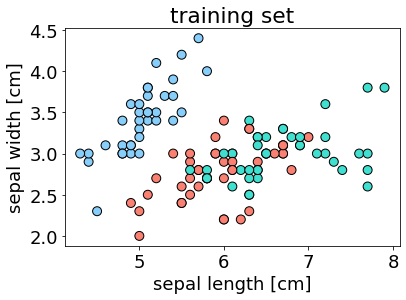

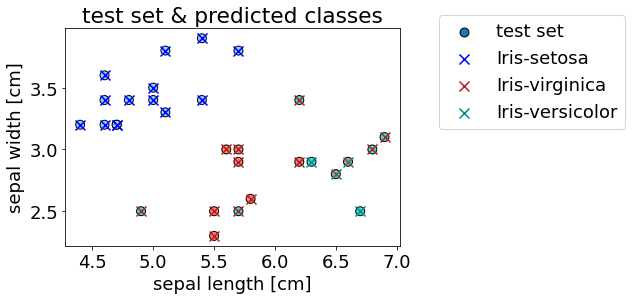

In [19]:
# Create color maps
mycols = ListedColormap(['lightskyblue', 'Salmon', 'Turquoise'])
mycols_dark = ListedColormap(['Blue', 'Firebrick', 'Darkcyan'])

markers = ['s','o','>']

plt.figure()
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=mycols, edgecolor='k', s=80)
plt.title('training set')
plt.xlabel('sepal length [cm]')
plt.ylabel('sepal width [cm]')
plt.show()

classes = ['Iris-setosa', 'Iris-virginica', 'Iris-versicolor']
plt.figure()
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=mycols, edgecolor='k', s=80, alpha=1, label = 'test set')
ind = 0
for y in np.unique(y_test_predicted):
    plt.scatter(X_test[y_test_predicted == ind, 0], X_test[y_test_predicted == ind, 1], color=mycols_dark(ind), marker = 'x',  edgecolor='k', s=100, label = classes[y])
    ind+=1
    
plt.legend(loc='center right', bbox_to_anchor=(1.7,0.8))
plt.title('test set & predicted classes')
plt.xlabel('sepal length [cm]')
plt.ylabel('sepal width [cm]')
plt.show()

Another fancy plot

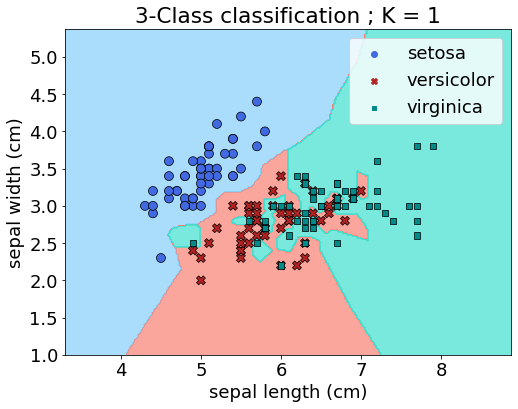

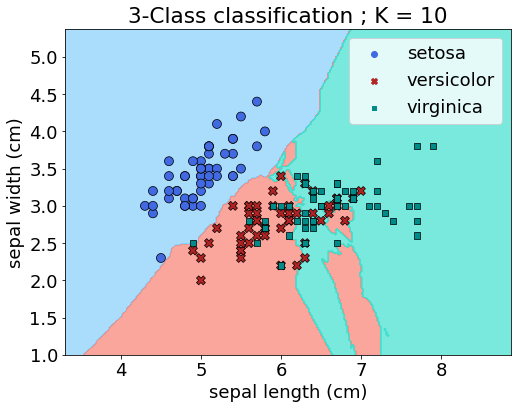

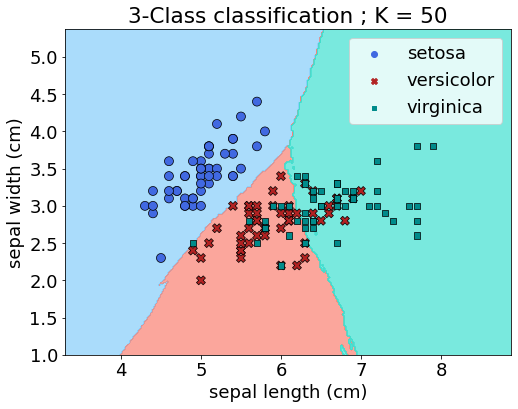

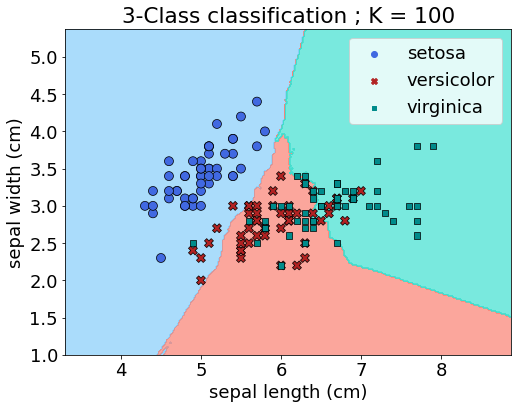

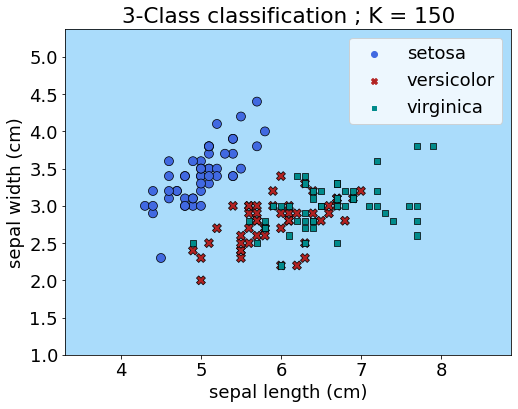

In [21]:
n_neighbors = [1, 10, 50, 100, 150]

# import some data to play with
iris = datasets.load_iris()

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

h = .02  # step size in the mesh

# Create color maps
mycols_dark_sns = ['RoyalBlue', 'Firebrick', 'Darkcyan']

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

for K in n_neighbors:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(K, weights='uniform')
    clf.fit(X, y)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=mycols, alpha=0.7)

    # Plot also the training points
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=iris.target_names[y],
                    palette=mycols_dark_sns, alpha=1.0, s=80, style= iris.target_names[y], edgecolor="black")
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification ; K = "+str(K))
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])

plt.show()

Now try playing with the value of K - what do you see changes?